# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [5]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

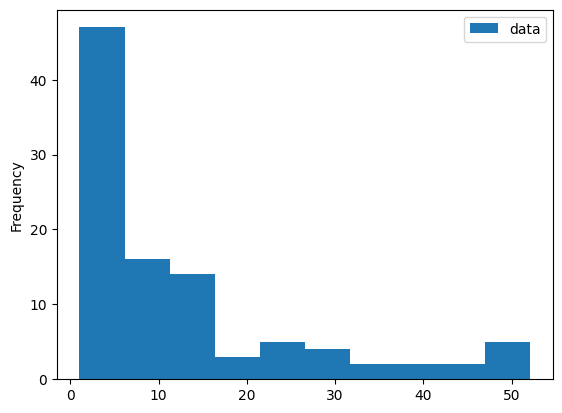

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

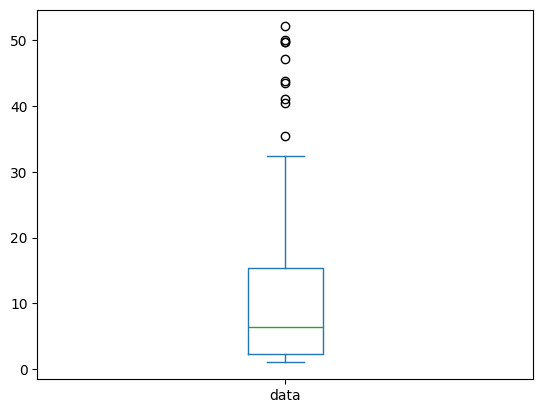

In [4]:
df.plot.box()

The histogram does a good job of showing how the vast majority of drug prices are distributed within the lower range of prices. The height difference in the bins shows a dramatic dropoff in price visually. The boxplot does a good job of showing the complete spread of data and highlighting the outliers compared to the rest of the data. The construction of the box and whiskers gives clear visual indications of the quartiles and median as well as identification of outliers. The cons of the histogram include lack of outlier identification and quartile identification. The major con of the boxplot is the inability to see the density or shape of the data's distribution even in concentrated areas. Since we are interested in comparing how the more expensive drugs cost with respect to the other prices of drugs sold, I would choose the boxplot. The boxplot clearly the shows how the more expensive drugs are significant outliers compared to the median and where the majority of the prices are distributed. Although also evident in the histogram, the boxplot is more obvious in its distinction of outliers with its construction. To make it more visually interesting, the boxplot could be overlayed with a kernel density estimate, creating a violin plot. This would show the shape of the data distribution while also keeping the features of the boxplot intact. In addition, labels could be added to specify the quartiles and also the types of drugs being at sold at particular price points.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import chardet
file_path = 'IRENA_RenewableEnergy_Statistics_2000-2022.csv'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

irena = pd.read_csv(file_path, encoding=result['encoding'])

irena.head()

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


In [7]:
irena.describe()

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
count,35193.000000,35193.000000,3.519300e+04,3.159400e+04
mean,420.592618,2012.283437,1.440929e+04,3.452455e+03
std,252.192524,6.499073,1.148906e+05,2.715673e+04
min,4.000000,2000.000000,-5.874050e+02,1.000000e-03
25%,203.000000,2007.000000,1.168300e+01,5.000000e+00
50%,404.000000,2013.000000,2.002570e+02,5.890000e+01
75%,634.000000,2018.000000,2.383631e+03,6.325750e+02
max,894.000000,2022.000000,5.220700e+06,1.155325e+06


In [8]:
irena.describe(include='object')

,Region,Sub-region,Country,ISO3 code,RE or Non-RE,Group Technology,Technology,Producer Type
count,35193,35193,35193,35193,35193,35193,35193,35193
unique,5,17,224,224,2,10,19,2
top,Europe,Latin America and the Caribbean,United States of America (the),USA,Total Renewable,Fossil fuels,Oil,On-grid electricity
freq,10632,7134,531,531,22185,10359,5658,28675


In [9]:
irena_numerical = irena.select_dtypes(include=['number'])
irena_categorical = irena.select_dtypes(include=['object'])

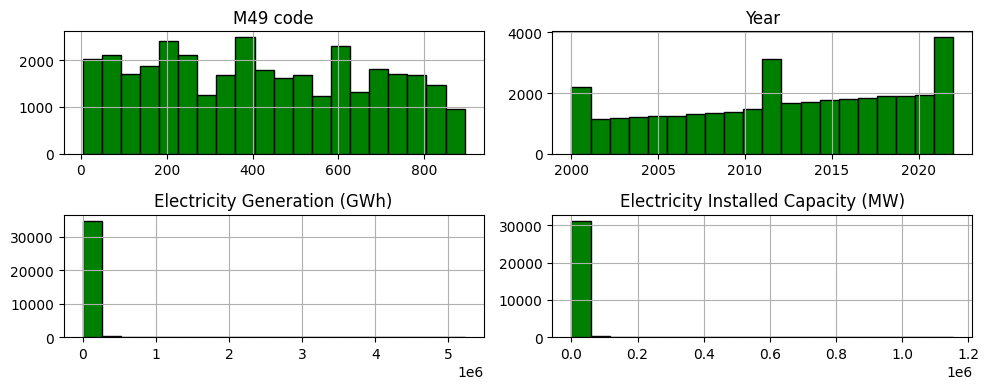

In [10]:
irena_numerical.hist(bins=20, figsize=(10, 4), color='green', edgecolor='black')
plt.tight_layout()
plt.show()

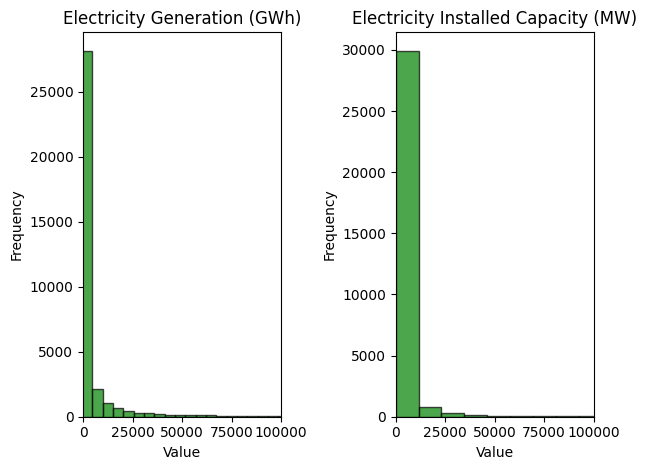

In [11]:
#Scaled down x-axis to make majority of distribution visible

plt.subplot(1,2,1)
plt.hist(irena_numerical['Electricity Generation (GWh)'], bins=1000, color='green', edgecolor='black', alpha=0.7)
plt.xlim(0, 100000)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Electricity Generation (GWh)')

plt.subplot(1,2,2)
plt.hist(irena_numerical['Electricity Installed Capacity (MW)'], bins=100, color='green', edgecolor='black', alpha=0.7)
plt.xlim(0, 100000)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Electricity Installed Capacity (MW)')

plt.tight_layout()
plt.show()

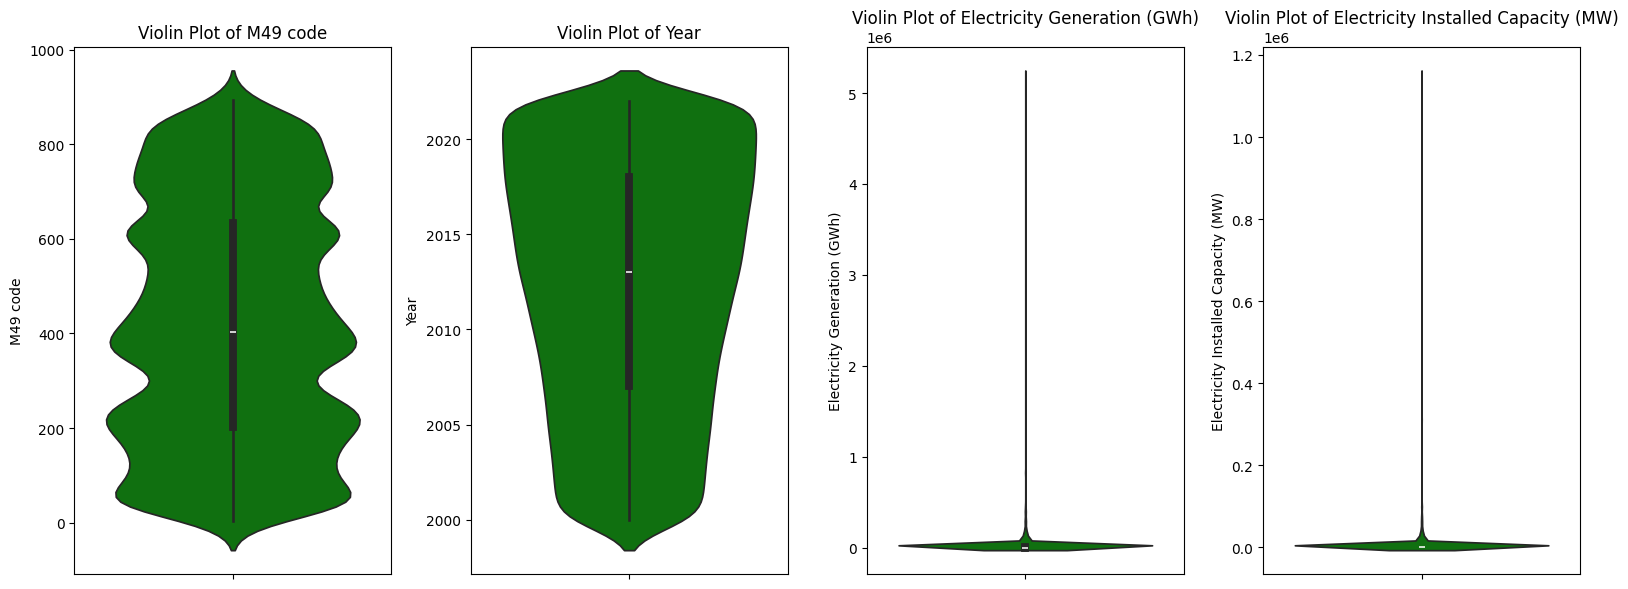

In [12]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(irena_numerical.columns, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(y=irena_numerical[col], color='green')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

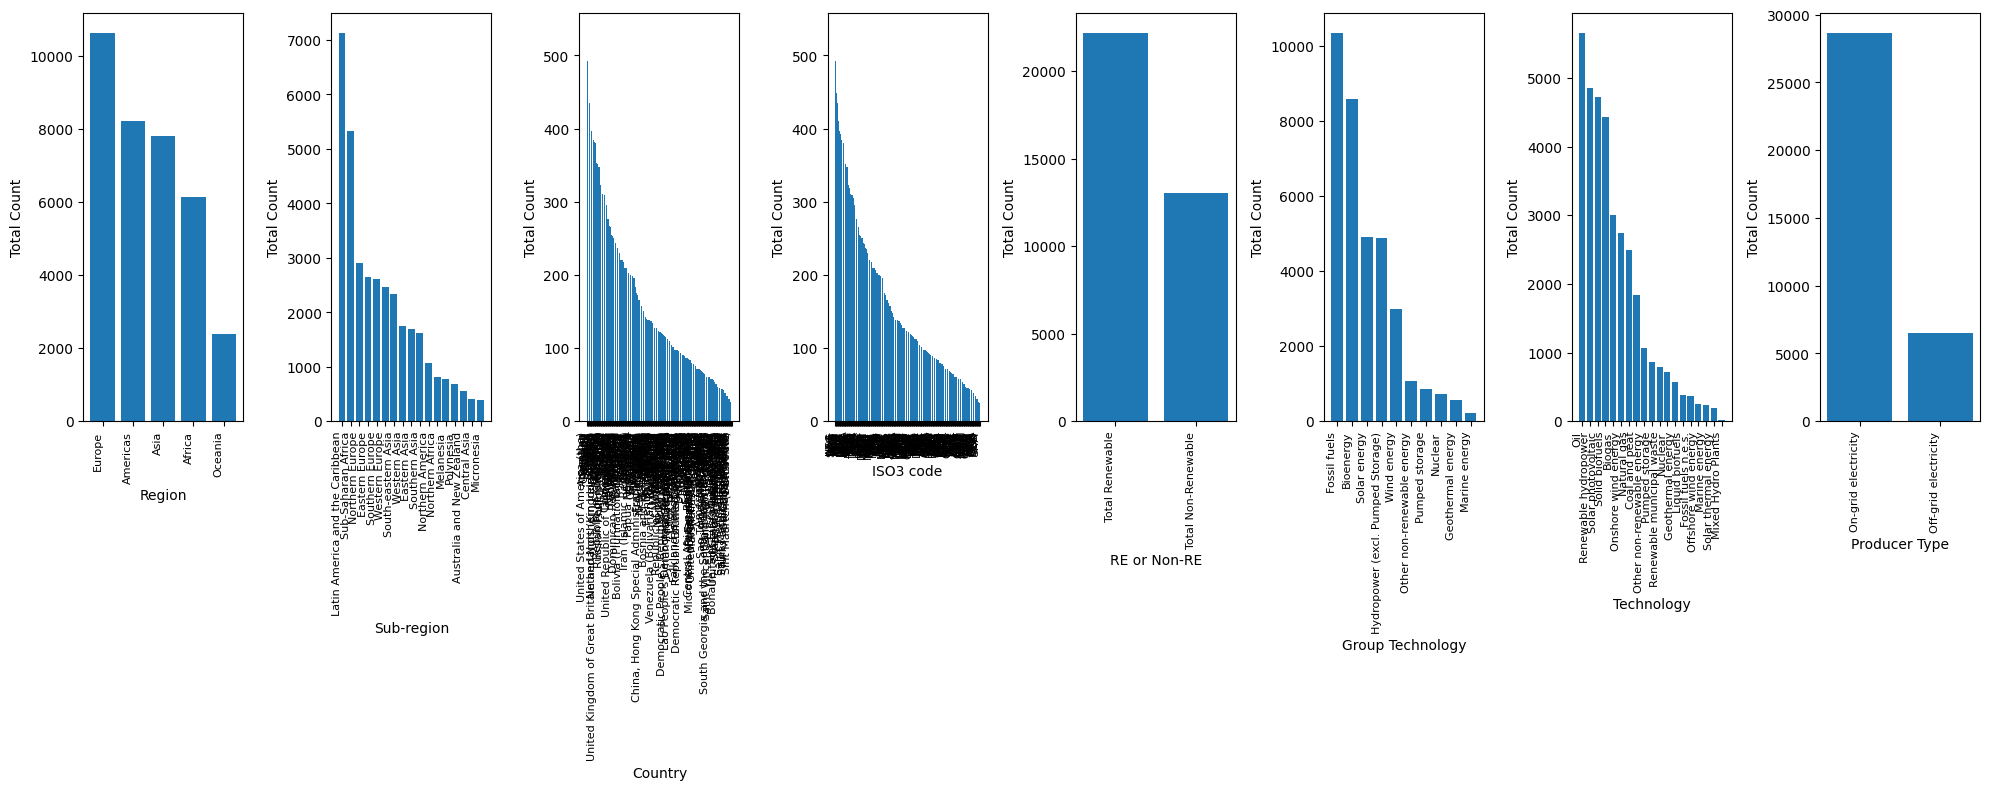

In [13]:
plt.figure(figsize=(20, 8))

for i, col in enumerate(irena_categorical, 1):
    plt.subplot(1, len(irena_categorical.columns), i)

    category_counts = irena_categorical[col].value_counts()
    plt.bar(category_counts.index, category_counts.values)

    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.ylabel('Total Count')
    
plt.tight_layout()
plt.show()

In [15]:
file_path_1 = 'organised_Gen.csv'

with open(file_path_1, 'rb') as f:
    result = chardet.detect(f.read())

us_data = pd.read_csv(file_path_1, encoding=result['encoding'])

us_data.head()

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [15]:
us_data.describe()

,Unnamed: 0,YEAR,MONTH,GENERATION (Megawatthours)
count,496774.000000,496774.000000,496774.000000,4.967740e+05
mean,18143.269698,2011.649768,6.431452,1.393384e+06
std,13387.090505,6.168041,3.458944,1.078685e+07
min,0.000000,2001.000000,1.000000,-9.978550e+05
25%,7762.000000,2006.000000,3.000000,1.643000e+03
50%,15853.000000,2012.000000,6.000000,2.330103e+04
75%,24178.000000,2017.000000,9.000000,2.792042e+05
max,65144.000000,2022.000000,12.000000,4.217967e+08


In [16]:
us_data.describe(include='object')

,STATE,TYPE OF PRODUCER,ENERGY SOURCE
count,496774,496774,496774
unique,52,6,14
top,US-TOTAL,Total Electric Power Industry,Total
freq,18322,134452,73356


In [16]:
us_numerical = us_data.select_dtypes(include=['number'])
us_categorical = us_data.select_dtypes(include=['object'])

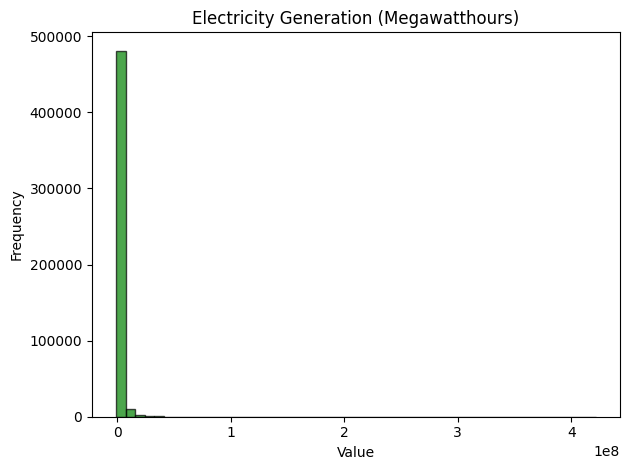

In [22]:
plt.hist(us_numerical['GENERATION (Megawatthours)'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Electricity Generation (Megawatthours)')

plt.tight_layout()
plt.show()

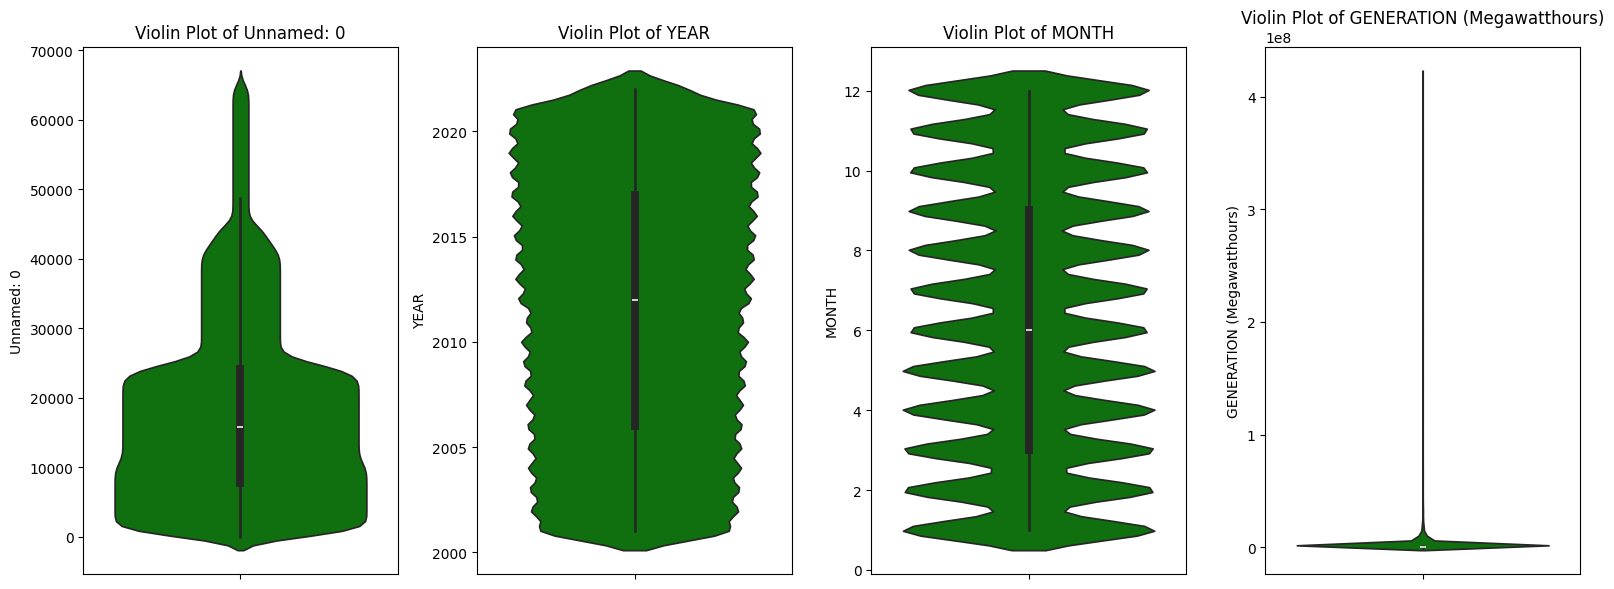

In [32]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(us_numerical.columns, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(y=us_numerical[col], color='green')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

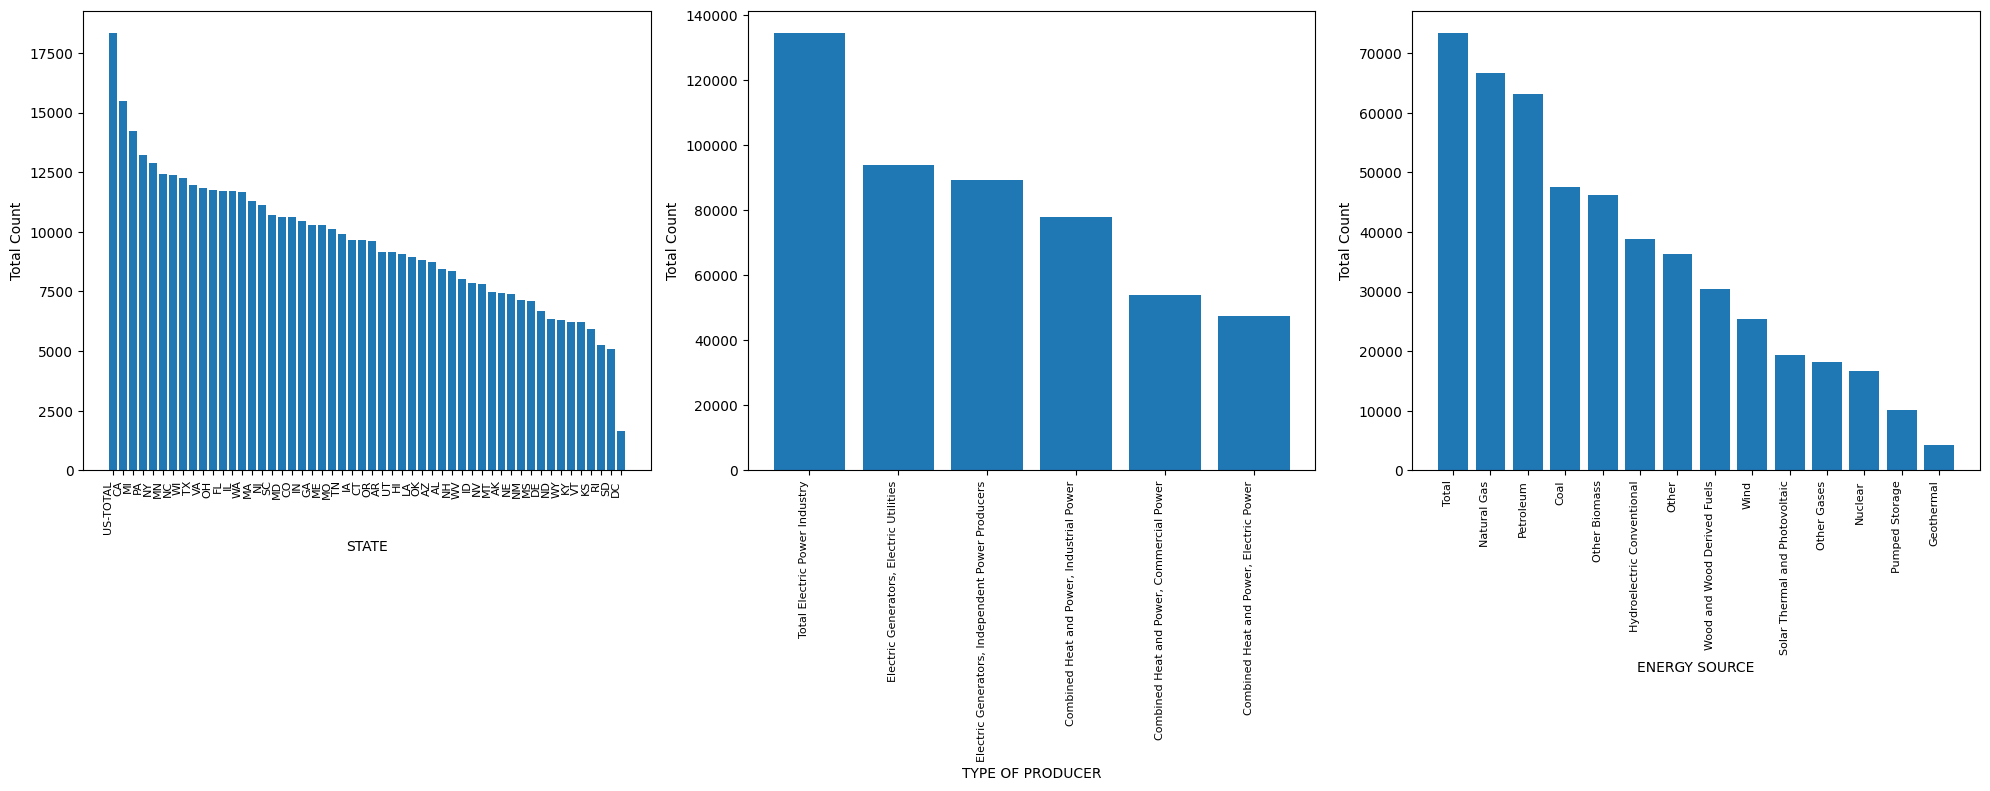

In [21]:
plt.figure(figsize=(20, 8))

for i, col in enumerate(us_categorical, 1):
    plt.subplot(1, len(us_categorical.columns), i)

    category_counts_us = us_categorical[col].value_counts()
    plt.bar(category_counts_us.index, category_counts_us.values)

    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.ylabel('Total Count')
    
plt.tight_layout()
plt.show()

In [7]:
file_path_2 = '02 modern-renewable-energy-consumption.csv'

with open(file_path_2, 'rb') as f:
    result = chardet.detect(f.read())

world_data = pd.read_csv(file_path_2, encoding=result['encoding'])

world_data.head()

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.164,0.0,0.0,26.013390
1,Africa,NaN,1972,0.165,0.0,0.0,29.633196
2,Africa,NaN,1973,0.170,0.0,0.0,31.345707
3,Africa,NaN,1974,0.175,0.0,0.0,35.667076
4,Africa,NaN,1975,0.172,0.0,0.0,37.717968


In [23]:
world_data.describe()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
count,5610.000000,5466.000000,5442.000000,5445.000000,5603.000000
mean,1993.834759,13.455595,5.480776,15.027906,147.892846
std,16.301699,47.644151,39.895114,84.727689,390.187379
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,0.000000,0.000000,0.000000,1.368538
50%,1994.000000,0.227000,0.000000,0.000000,10.693000
75%,2008.000000,4.270843,0.017030,0.276075,65.841800
max,2021.000000,762.782650,1032.501200,1861.939800,4345.990000


In [24]:
world_data.describe(include='object')

,Entity,Code
count,5610,4299
unique,104,81
top,Africa,DZA
freq,57,57


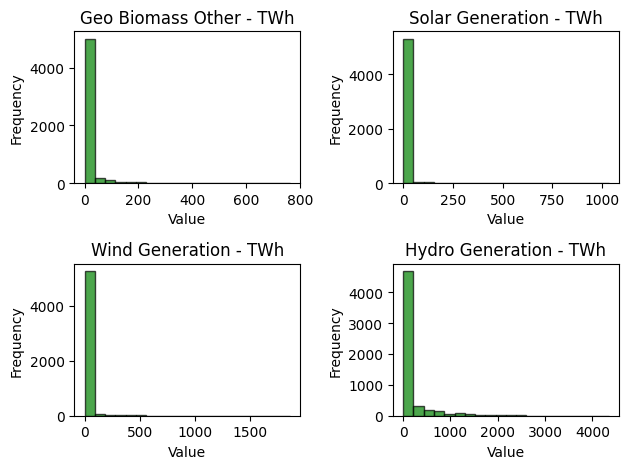

In [13]:
plt.subplot(2,2,1)
plt.hist(world_data['Geo Biomass Other - TWh'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Geo Biomass Other - TWh')

plt.subplot(2,2,2)
plt.hist(world_data['Solar Generation - TWh'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Solar Generation - TWh')

plt.subplot(2,2,3)
plt.hist(world_data['Wind Generation - TWh'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Wind Generation - TWh')

plt.subplot(2,2,4)
plt.hist(world_data['Hydro Generation - TWh'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Hydro Generation - TWh')

plt.tight_layout()
plt.show()

In [26]:
world_numerical = world_data.select_dtypes(include=['number'])
world_categorical = world_data.select_dtypes(include=['object'])

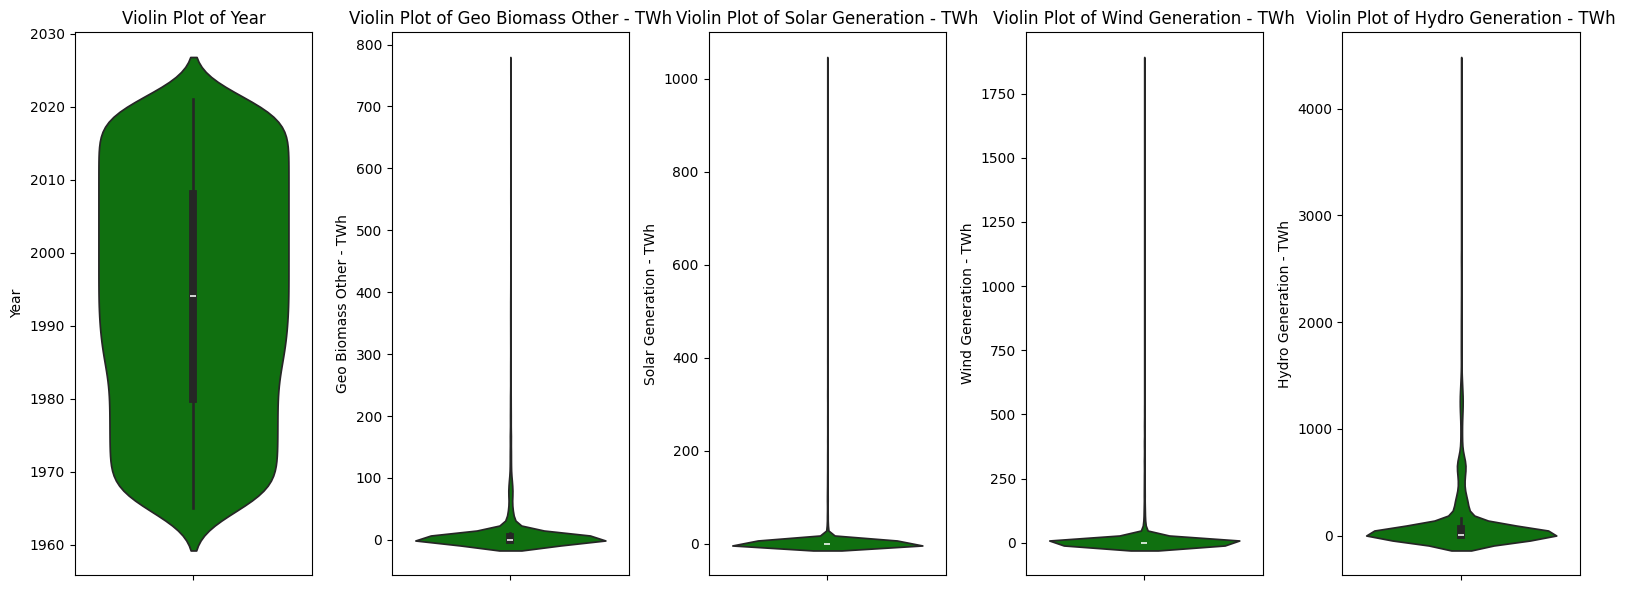

In [35]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(world_numerical.columns, 1):
    plt.subplot(1, 5, i)
    sns.violinplot(y=world_numerical[col], color='green')
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

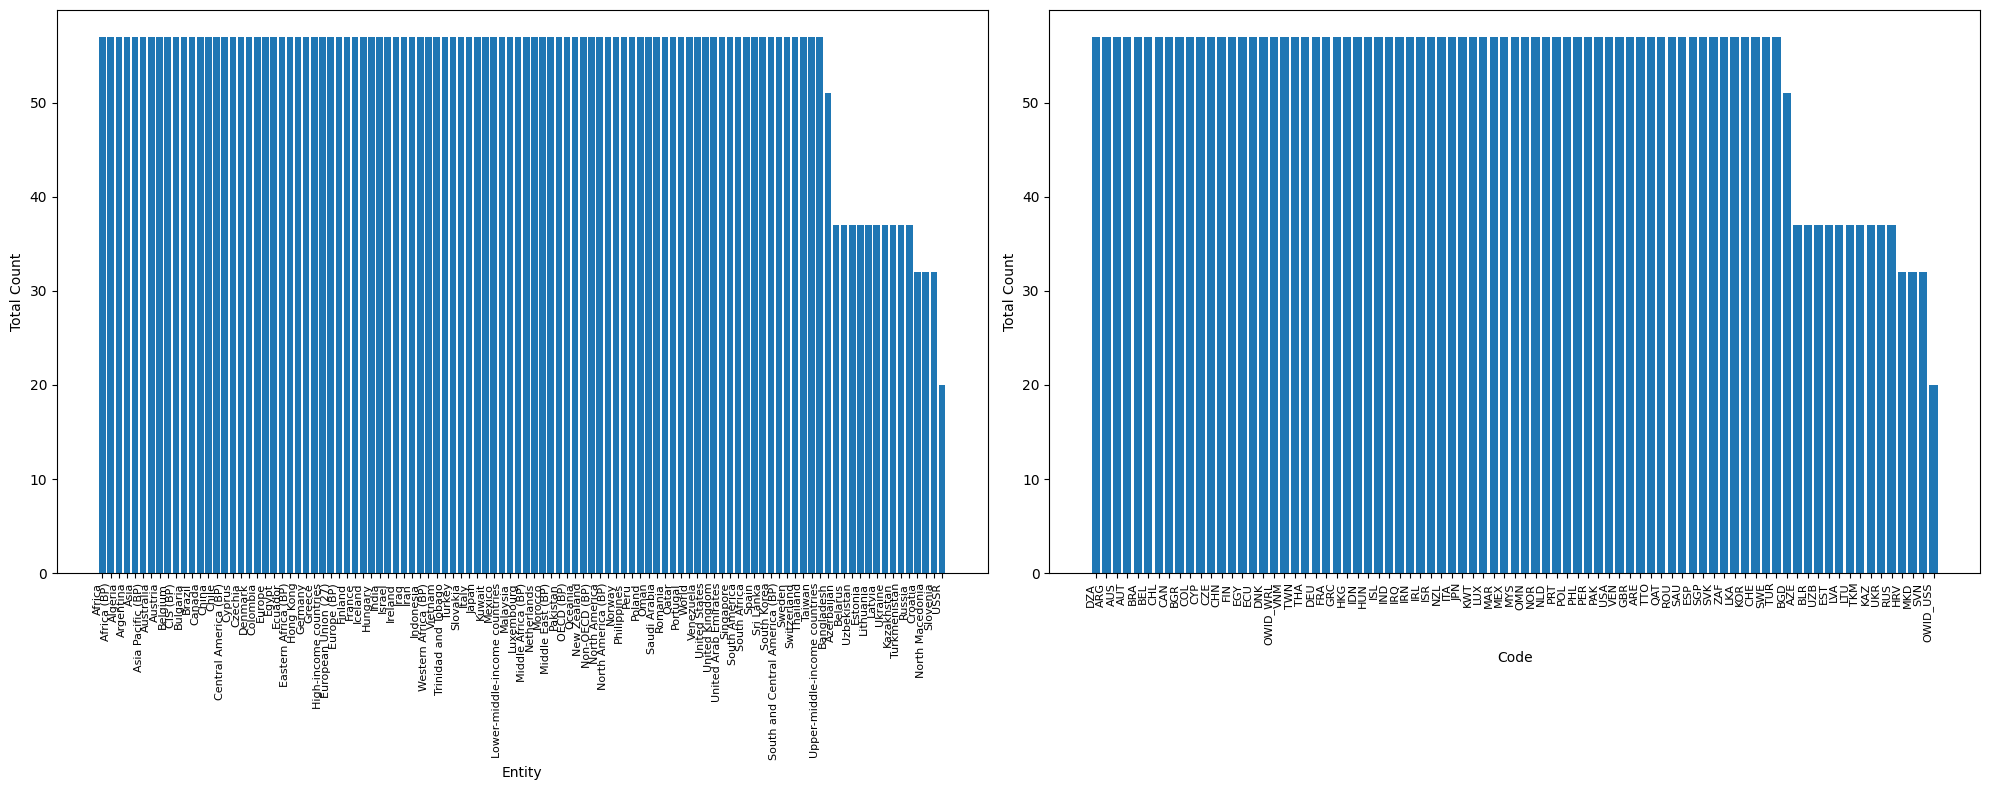

In [27]:
plt.figure(figsize=(20, 8))

for i, col in enumerate(world_categorical, 1):
    plt.subplot(1, len(world_categorical.columns), i)

    category_counts_world = world_categorical[col].value_counts()
    plt.bar(category_counts_world.index, category_counts_world.values)

    plt.xlabel(col)
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.ylabel('Total Count')
    
plt.tight_layout()
plt.show()

In conclusion, the data is what I would expect from a univariate standpoint. Across all three datasets, the main metric being examined is energy generation, aggregated from a wide demographic range, and also technology/methodology range. This kind of data heavily relies on the time aspect of energy generation so that trends can be identified with regards to worldwide/state energy production. That is why the univariate plots do not provide much insight on their own, as this data is meant to be analyzed in a bivariate manner. Many of the distributions for energy production look to be skewed to the left. This is likely a result of some technologies not being adapted for energy production early on, as well as the rapid acceleration of energy production that we've seen in recent decades. Therefore, what would be considered outliers are likely a natural result of technological innovations. Bin sizes in these skewed histograms are important to at least try and visualize some aspect of the univariate plots. Increasing the bin sizes results in some spread of the distribution of data across all datasets, though much of the concentration is still around or just above zero.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

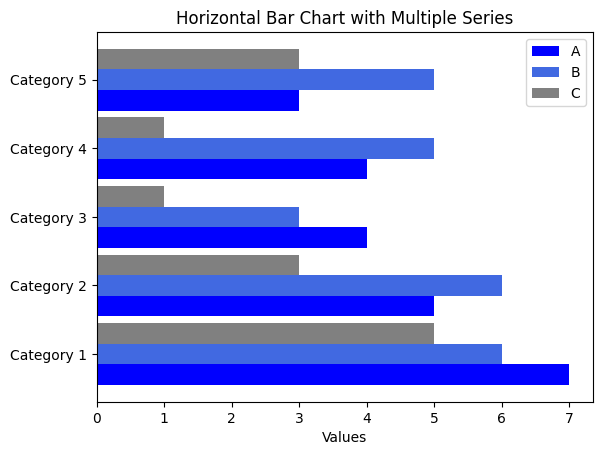

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#Horizontal bar charts with multiple series pp.57

categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
series1 = [7,5,4,4,3]
series2 = [6,6,3,5,5]
series3 = [5,3,1,1,3]

bar_width = 0.3  
y_positions = np.arange(len(categories))

plt.barh(y_positions - bar_width, series1, bar_width, label='A', color='blue')
plt.barh(y_positions, series2, bar_width, label='B', color='royalblue')
plt.barh(y_positions + bar_width , series3, bar_width, label='C', color='gray')

plt.yticks(y_positions, categories)
plt.xlabel('Values')
plt.title('Horizontal Bar Chart with Multiple Series')
plt.legend()

plt.show()